# Lab 3 - Machine Learning 

## Marketing Digital Prevendo Número de Usuários Convertidos

**Descrição projeto**

Você foi contratado como Cientista de Dados por uma empresa que comercializa produtos digitais. A empresa trabalha diversas estratégias de Marketing Digital e gostaria de ter um modelo de Machine Learning capaz de prever quantos usuários serão convertidos (ou seja,quantas pessoas comprarão os produtos da empresa) após cada campanha. 

Conseguindo fazer a previsão, a empresa pode ter uma ideia mais clara de quanto deve investir em cada campanha e
o retorno esperado. Isso ajudará também no planejamento da empresa para comercialização e entrega do seu produto digital, além do uso de ferramentas e mídias sociais.

Dados históricos de campanhas passadas estão disponíveis e seu trabalho como Cientista de Dados é construir um modelo que, ao receber novos dados, seja capaz de prever o número de usuários convertidos em uma campanha de Marketing Digital. Além disso, o Gestor de Marketing precisa saber qual seria o aumento no número de usuários convertidos se aumentar em 1
unidade o valor gasto em uma campanha. 

Entretanto, os dados têm problemas (exatamente o que você encontrará no dia a dia) e você deve detectar esses problemas, decidir a melhor estratégia para resolvê-los e então criar seu modelo. Pode ser necessário criar diferentes versões do modelo até chegar ao modelo ideal. 

Quando chegar à versão ideal do modelo, você deve fornecer uma interpretação completa de como o modelo gera o resultado final para que os gestores tenham mais confiança no uso do modelo.

Por fim, você deve fornecer uma forma de fazer o deploy do modelo e usá-lo imediatamente com novos dados.

**Obejtivos**

**Problema 2 - Pergunta de Negócio do Lab 3**

Um Lead será convertido? Sim ou Não? Qual a probabilidade? (Classificação)

In [1]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import random
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 


# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

# Configuração para os gráficos largura e layout dos graficos
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.8)
color = sns.color_palette()

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Author: Versões das bibliotecas

numpy     : 1.23.5
matplotlib: 3.7.2
pandas    : 2.0.3
re        : 2.2.1
watermark : 2.4.3
seaborn   : 0.12.2

Versão python neste Jupyter Notebook: 3.9.13


## Base dados

In [2]:
# Base dados
data = pd.read_csv("dataset.csv")
data

,numero_acessos,numero_cliques,faixa_etaria,cidade,cor_da_pele,navegador_web,converteu
0,65,57,18-24,Curitiba,negro,Edge,sim
1,99,38,55-64,Fortaleza,negro,Safari,sim
2,24,23,25-34,Curitiba,pardo,Chrome,sim
3,49,1,35-44,Curitiba,pardo,Edge,não
4,25,12,55-64,Natal,branco,Safari,não
...,...,...,...,...,...,...,...
995,72,15,55-64,Salvador,branco,Edge,sim
996,1,0,35-44,Curitiba,pardo,Firefox,não
997,81,42,18-24,Blumenau,negro,Chrome,sim
998,17,17,18-24,Curitiba,pardo,Edge,não


In [3]:
# Visualizando os 5 primeiros dados
data.head()

,numero_acessos,numero_cliques,faixa_etaria,cidade,cor_da_pele,navegador_web,converteu
0,65,57,18-24,Curitiba,negro,Edge,sim
1,99,38,55-64,Fortaleza,negro,Safari,sim
2,24,23,25-34,Curitiba,pardo,Chrome,sim
3,49,1,35-44,Curitiba,pardo,Edge,não
4,25,12,55-64,Natal,branco,Safari,não


In [4]:
# Visualizando os 5 últimos dados
data.tail()

,numero_acessos,numero_cliques,faixa_etaria,cidade,cor_da_pele,navegador_web,converteu
995,72,15,55-64,Salvador,branco,Edge,sim
996,1,0,35-44,Curitiba,pardo,Firefox,não
997,81,42,18-24,Blumenau,negro,Chrome,sim
998,17,17,18-24,Curitiba,pardo,Edge,não
999,72,22,25-34,Salvador,pardo,Safari,sim


In [5]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   numero_acessos  1000 non-null   int64 
 1   numero_cliques  1000 non-null   int64 
 2   faixa_etaria    1000 non-null   object
 3   cidade          1000 non-null   object
 4   cor_da_pele     1000 non-null   object
 5   navegador_web   1000 non-null   object
 6   converteu       1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [6]:
# Tipo dados
data.dtypes

numero_acessos     int64
numero_cliques     int64
faixa_etaria      object
cidade            object
cor_da_pele       object
navegador_web     object
converteu         object
dtype: object

In [7]:
# Total de colunas e linhas 
print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 1000
Números de colunas: 7


In [8]:
# Exibindo valores ausentes e valores únicos
print("\nMissing values\n", data.isnull().sum().values.sum())
print("\nUnique values\n",data.nunique())


Missing values
 0

Unique values
 numero_acessos    100
numero_cliques     95
faixa_etaria        5
cidade              5
cor_da_pele         3
navegador_web       4
converteu           2
dtype: int64


In [9]:
# Verificando dados ausentes
data.isna().sum()

numero_acessos    0
numero_cliques    0
faixa_etaria      0
cidade            0
cor_da_pele       0
navegador_web     0
converteu         0
dtype: int64

In [10]:
# Dados duplicados
data.duplicated().sum()

0

## Análise exploratória de dados

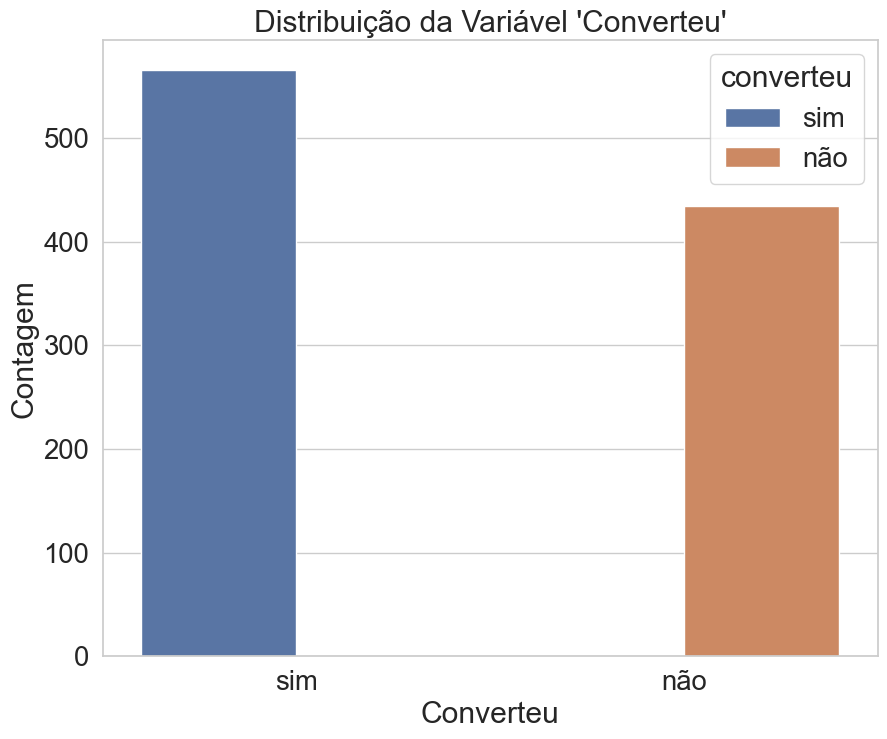

In [11]:
# Gráfico de barras
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='converteu', hue="converteu")

# Adicione rótulos aos eixos e um título
plt.xlabel('Converteu')
plt.ylabel('Contagem')
plt.title("Distribuição da Variável 'Converteu'")

# Exiba o gráfico
plt.show()

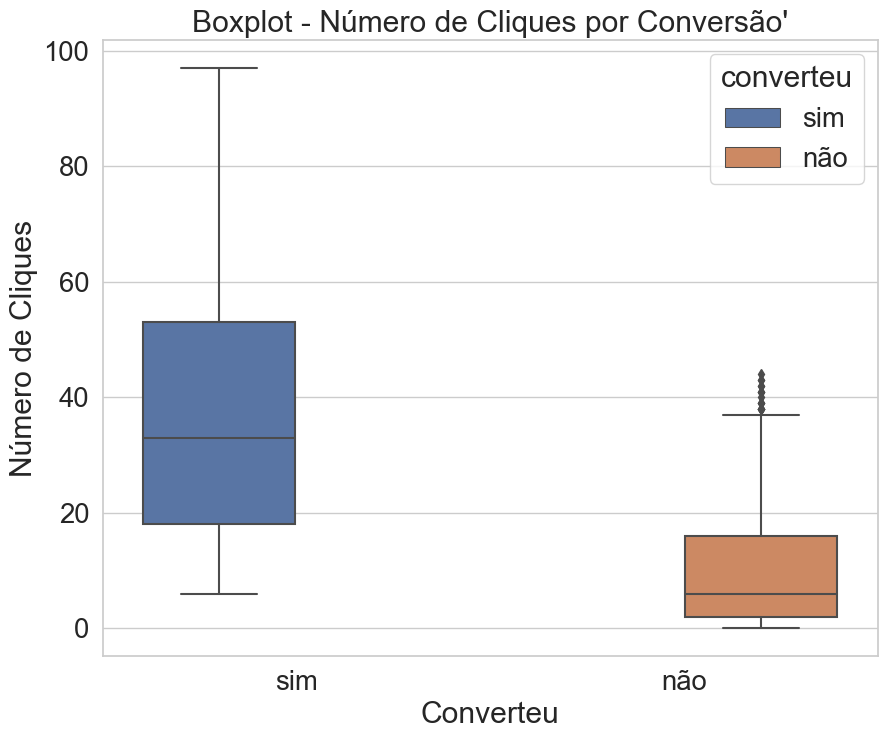

In [12]:
# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data = data, x="converteu", y="numero_cliques", hue="converteu")
# Adicione rótulos aos eixos e um título
plt.xlabel('Converteu')
plt.ylabel('Número de Cliques')
plt.title("Boxplot - Número de Cliques por Conversão'")

# Exiba o gráfico
plt.show()

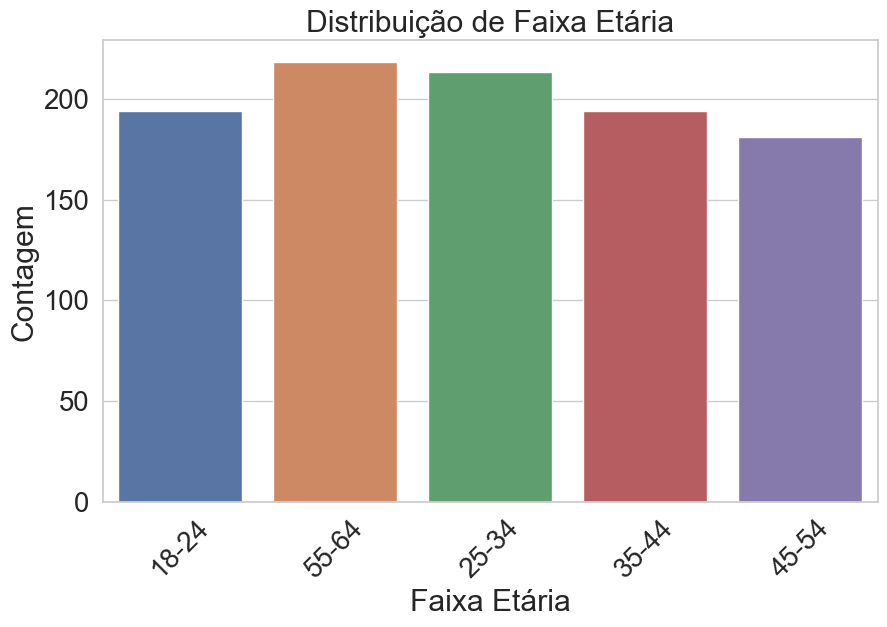

In [13]:
# Gráfico de barras

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='faixa_etaria')

# Adicione rótulos aos eixos e um título
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Distribuição de Faixa Etária')

# Rotacione os rótulos do eixo x para melhorar a legibilidade (opcional)
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()

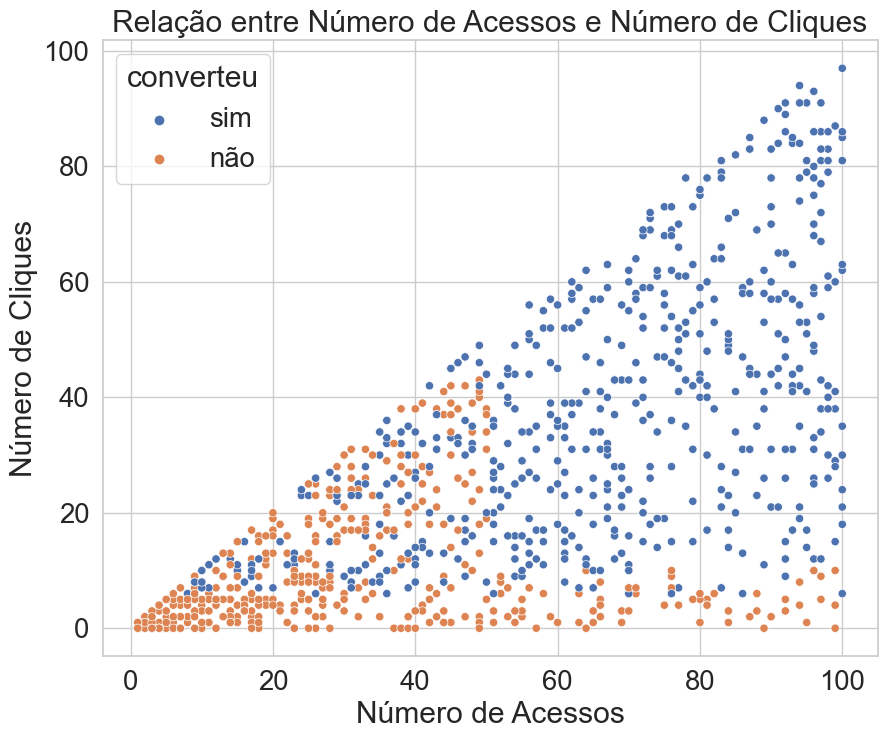

In [14]:
# Gráfico de dispersão
plt.figure(figsize=(10, 8))  
sns.scatterplot(data=data, x='numero_acessos', y='numero_cliques', hue="converteu")

# Adicione rótulos aos eixos e um título
plt.xlabel('Número de Acessos')
plt.ylabel('Número de Cliques')
plt.title('Relação entre Número de Acessos e Número de Cliques')

# Exiba o gráfico
plt.show()

In [15]:
# Use o método groupby() para agrupar os dados pela coluna 'cidade' e calcule a média usando o método mean()
dados_sumarizados = data.groupby('cidade')['numero_acessos'].mean().reset_index()

# O resultado será um novo DataFrame com a média do número de acessos por cidade
print(dados_sumarizados)

      cidade  numero_acessos
0   Blumenau       51.360825
1   Curitiba       49.682464
2  Fortaleza       51.890909
3      Natal       53.047368
4   Salvador       48.875676


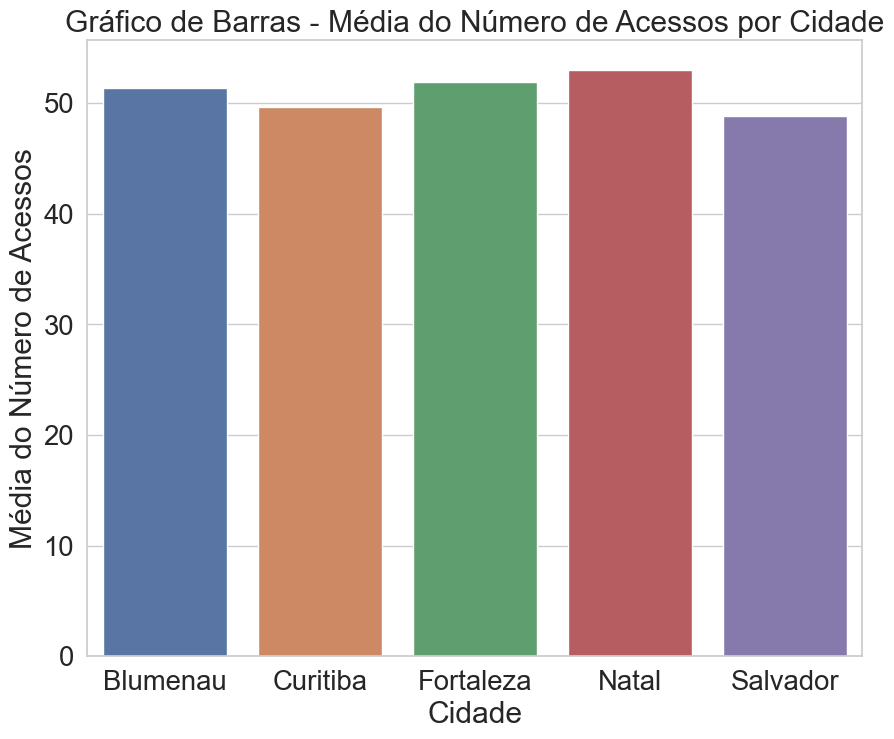

In [16]:
# Gráfico de barras
plt.figure(figsize=(10, 8))  
sns.barplot(x="cidade", y="numero_acessos", data=dados_sumarizados)
# Adicione rótulos aos eixos e um título
plt.xlabel('Cidade')
plt.ylabel('Média do Número de Acessos')
plt.title('Gráfico de Barras - Média do Número de Acessos por Cidade')

# Exiba o gráfico
plt.show()

## Features modelo

In [17]:
# Divida os dados em recursos (X) e variável alvo (y)

# Recursos
x = data.drop('converteu', axis=1)  

# Variável alvo
y = data['converteu']

In [18]:
# Visualizando features (x)
x.shape

(1000, 6)

In [19]:
# Visualizando features (y)
y.shape

(1000,)

## Pré-Processamento e Encoding de Variáveis Categóricas

Pré-processamento e codificação (encoding) de variáveis categóricas são etapas importantes na preparação de dados para modelos de machine learning. Abaixo, descreverei essas etapas e fornecerei um exemplo de como realizar essas operações usando Python e a biblioteca pandas.

## Pré-Processamento de Variáveis Categóricas

**Identificação de Variáveis Categóricas:** Primeiro, identifique as colunas do seu conjunto de dados que contêm variáveis categóricas. Essas são colunas que contêm informações não numéricas, como categorias, nomes, cores, etc.


**Tratamento de Valores Ausentes:** Verifique se há valores ausentes nas variáveis categóricas e decida como tratá-los (por exemplo, preenchendo com um valor padrão ou eliminando as linhas com valores ausentes).


**Codificação de Variáveis Categóricas:** Converta as variáveis categóricas em um formato numérico que os modelos de machine learning possam entender. Existem várias técnicas para fazer isso.


**Codificação de Variáveis Categóricas**


**Label Encoding:** Esta técnica é usada quando uma variável categórica tem duas categorias únicas. Por exemplo, "sim" e "não" podem ser codificadas como 1 e 0, respectivamente.


**One-Hot Encoding:** É usada quando uma variável categórica tem mais de duas categorias únicas. Cria colunas binárias (0 ou 1) para cada categoria. O pandas possui uma função get_dummies() que facilita essa codificação.

In [20]:
## Aplicando label encoding à variável alvo

# Importando biblioteca 
from sklearn.preprocessing import LabelEncoder

# Codifique as variáveis categóricas, se necessário
le = LabelEncoder()
X_encoded = x.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
le

LabelEncoder()

In [21]:
# Visualizando dados
X_encoded.shape

(1000, 6)

In [22]:
# Aplique o Label Encoding às variáveis categóricas
data['cidade'] = le.fit_transform(data['cidade'])
data['cor_da_pele'] = le.fit_transform(data['cor_da_pele'])
data['navegador_web'] = le.fit_transform(data['navegador_web'])

# Visualizando 
data

,numero_acessos,numero_cliques,faixa_etaria,cidade,cor_da_pele,navegador_web,converteu
0,65,57,18-24,1,1,1,sim
1,99,38,55-64,2,1,3,sim
2,24,23,25-34,1,2,0,sim
3,49,1,35-44,1,2,1,não
4,25,12,55-64,3,0,3,não
...,...,...,...,...,...,...,...
995,72,15,55-64,4,0,1,sim
996,1,0,35-44,1,2,2,não
997,81,42,18-24,0,1,0,sim
998,17,17,18-24,1,2,1,não


In [27]:
# Salvando modelo
data.to_csv("dataset_final.csv")

# Feature Engineering

Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações.
Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não

As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [28]:
from sklearn.preprocessing import LabelEncoder

for i in data.columns:
    if data[i].dtype==np.number:
        continue
    data[i]= LabelEncoder().fit_transform(data[i])
    
data.head(4)

,numero_acessos,numero_cliques,faixa_etaria,cidade,cor_da_pele,navegador_web,converteu
0,64,57,0,1,1,1,1
1,98,38,4,2,1,3,1
2,23,23,1,1,2,0,1
3,48,1,2,1,2,1,0


In [29]:
# Divida os dados em recursos (X) e variável alvo (y)

# Recursos
data_train_x = data.drop('converteu', axis=1)  

# Variável alvo
data_train_y = data['converteu']

In [30]:
# Visualizando features (x)
x.shape

(1000, 6)

In [31]:
# Visualizando features (y)
y.shape

(1000,)

## Treino teste

- Dividir o conjunto de dados em treinamento e teste

In [32]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data_train_x, 
                                                    data_train_y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [33]:
# Visualizando dados treino
X_train.shape

(800, 6)

In [34]:
# Visualizando dados teste
y_train.shape

(800,)

## Machine learning - Modelagem Preditiva

**Modelo 01 - Regressão logística**

In [35]:
%%time

# Importando biblioteca
from sklearn.linear_model import LogisticRegression

# Criando modelo regressão logistica
modelo_regressao_logistica = LogisticRegression()

# Treinamento modelo
modelo_regressao_logistica_fit = modelo_regressao_logistica.fit(X_train, y_train)

# Visualizando modelo
modelo_regressao_logistica

CPU times: total: 15.6 ms
Wall time: 68.9 ms


LogisticRegression()

In [36]:
# Score modelo
modelo_score = modelo_regressao_logistica.score(X_train, y_train)
print("Model - Regressão logistica: %.2f" % (modelo_score * 100))

Model - Regressão logistica: 82.00


In [37]:
# Previsão modelo
modelo_regressao_logistica_pred = modelo_regressao_logistica.predict(X_test)
modelo_regressao_logistica_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

accuracy_regressao_logistica = accuracy_score(y_test, modelo_regressao_logistica_pred)
print("Accuracy - Regressão logistica: %.2f" % (accuracy_regressao_logistica * 100))

Accuracy - Regressão logistica: 80.00


In [39]:
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, modelo_regressao_logistica_pred)

print('Confusion matrix - Regressão logistica \n\n', matrix_confusion)
print('\nTrue Positives(TP) = ', matrix_confusion[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion[1,0])

Confusion matrix - Regressão logistica 

 [[69 21]
 [19 91]]

True Positives(TP) =  69

True Negatives(TN) =  91

False Positives(FP) =  21

False Negatives(FN) =  19


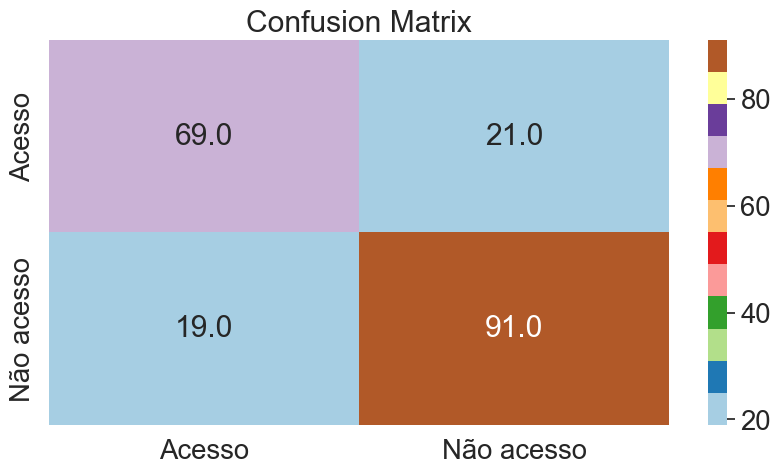

In [40]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

roc_auc 0.9135353535353535


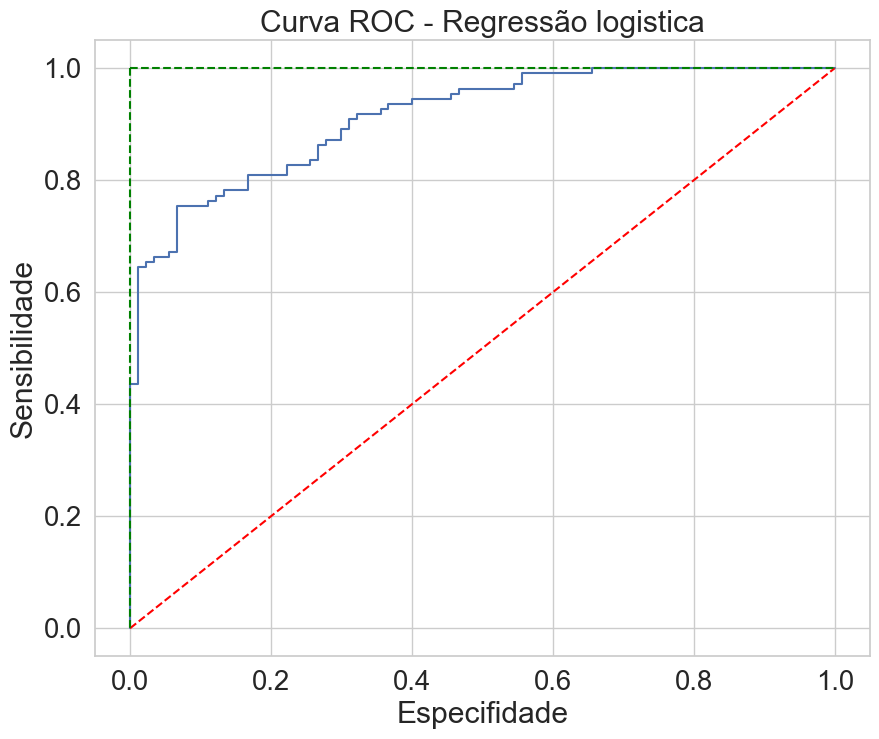

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = modelo_regressao_logistica.predict_proba(X_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(10,8))
plt.title('Curva ROC - Regressão logistica')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [42]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, modelo_regressao_logistica_pred)
print("Modelo 01 - Regressão logistica")
print()
print(classification)

Modelo 01 - Regressão logistica

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        90
           1       0.81      0.83      0.82       110

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, modelo_regressao_logistica_pred)
Recall = recall_score(y_test, modelo_regressao_logistica_pred)
Accuracy = accuracy_score(y_test, modelo_regressao_logistica_pred)
F1_Score = f1_score(y_test, modelo_regressao_logistica_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.827273
3,F1_Score,0.819820
0,precision,0.812500
2,Accuracy,0.800000


## Modelo 02 - Decision Tree

In [44]:
%%time

# Importando biblioteca
from sklearn.tree import DecisionTreeClassifier

# Criando modelo 
modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth=4, random_state=0)

# Treinamento modelo
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(X_train, y_train)

# Visualizando modelo
modelo_arvore_cla_1

CPU times: total: 0 ns
Wall time: 37.7 ms


DecisionTreeClassifier(max_depth=4, random_state=0)

In [45]:
# Score modelo
modelo_arvore_scor = modelo_arvore_cla_1.score(X_train, y_train)
print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 100.00


In [46]:
# Previsão do modelo
modelo_arvore_pred = modelo_arvore_cla_1.predict(X_test)
modelo_arvore_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [47]:
# Accuracy
acuracia_decision_tree = accuracy_score(y_test, modelo_arvore_pred)
print("Acuracia - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Acuracia - Decision Tree: 99.50


roc_auc 0.9944444444444445


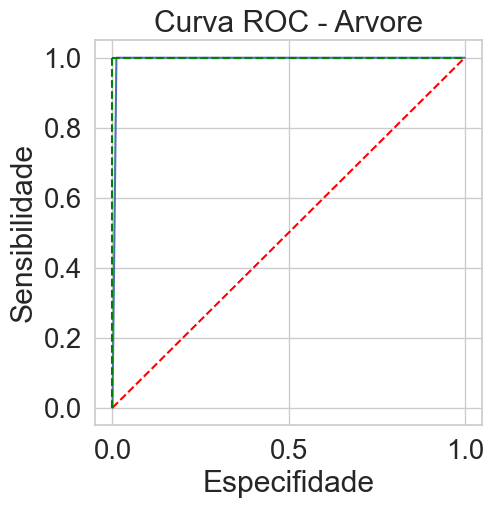

In [48]:
roc = modelo_arvore_cla_1.predict_proba(X_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Arvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [49]:
# confusion matrix 
matrix_confusion2 = confusion_matrix(y_test, modelo_arvore_pred)

print('Confusion matrix - Decision Tree \n\n', matrix_confusion2)
print('\nTrue Positives(TP) = ', matrix_confusion2[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion2[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion2[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion2[1,0])

Confusion matrix - Decision Tree 

 [[ 89   1]
 [  0 110]]

True Positives(TP) =  89

True Negatives(TN) =  110

False Positives(FP) =  1

False Negatives(FN) =  0


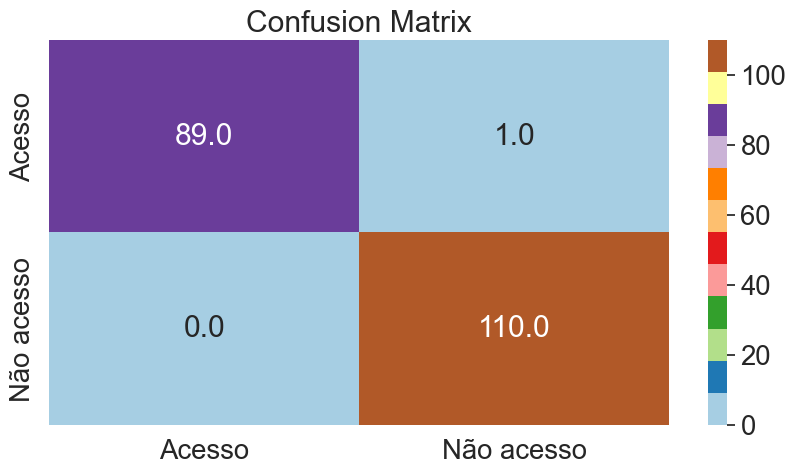

In [50]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

In [51]:
class_report = classification_report(y_test, modelo_arvore_pred)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.99      1.00      1.00       110

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [52]:
precision = precision_score(y_test, modelo_arvore_pred)
Recall = recall_score(y_test, modelo_arvore_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_pred)
F1_Score = f1_score(y_test, modelo_arvore_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,1.000000
3,F1_Score,0.995475
2,Accuracy,0.995000
0,precision,0.990991


## Modelo 03 - Naive bayes

In [53]:
%%time

# Importando biblioteca
from sklearn.naive_bayes import GaussianNB

# Criando modelo
model_naive_bayes = GaussianNB()

# Treinamento modelo
model_naive_bayes_fit = model_naive_bayes.fit(X_train, y_train)

# Visualizando modelo
model_naive_bayes

CPU times: total: 0 ns
Wall time: 6.24 ms


GaussianNB()

In [54]:
# Score modelo
model_naive_bayes_score = model_naive_bayes.score(X_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_naive_bayes_score * 100))

Modelo - Naive Bayes: 79.88


In [55]:
# Previsão do modelo - Naive bayes
model_naive_bayes_pred_predict = model_naive_bayes.predict(X_test)
model_naive_bayes_pred_predict

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [56]:
# Previsão com função probabiliestico do modelo - Naive bayes
model_naive_bayes_pred = model_naive_bayes.predict_proba(X_test)
model_naive_bayes_pred

array([[1.34852210e-10, 1.00000000e+00],
       [1.46759284e-01, 8.53240716e-01],
       [9.74296497e-01, 2.57035033e-02],
       [1.05743965e-09, 9.99999999e-01],
       [6.91980276e-01, 3.08019724e-01],
       [9.48360666e-01, 5.16393339e-02],
       [5.58029794e-01, 4.41970206e-01],
       [5.08483112e-03, 9.94915169e-01],
       [7.54737376e-01, 2.45262624e-01],
       [1.99770090e-01, 8.00229910e-01],
       [6.40555926e-02, 9.35944407e-01],
       [9.45625235e-01, 5.43747648e-02],
       [9.59797354e-01, 4.02026462e-02],
       [7.44042152e-06, 9.99992560e-01],
       [9.82559496e-01, 1.74405040e-02],
       [8.10763319e-13, 1.00000000e+00],
       [8.22167624e-09, 9.99999992e-01],
       [1.51147996e-01, 8.48852004e-01],
       [1.30795814e-01, 8.69204186e-01],
       [8.67149431e-01, 1.32850569e-01],
       [9.32798376e-01, 6.72016242e-02],
       [7.82251663e-01, 2.17748337e-01],
       [2.78074348e-06, 9.99997219e-01],
       [2.78170373e-01, 7.21829627e-01],
       [6.898256

In [57]:
# Accuracy model
accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
print("Accuracy Naive bayes: %.2f" % (accuracy * 100))

Accuracy Naive bayes: 81.00


In [58]:
# Matrix confusion
matrix_confusion3 = confusion_matrix(y_test, model_naive_bayes_pred_predict)

print('Confusion matrix - Naive bayes \n\n', matrix_confusion3)
print('\nTrue Positives(TP) = ', matrix_confusion3[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion3[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion3[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion3[1,0])

Confusion matrix - Naive bayes 

 [[77 13]
 [25 85]]

True Positives(TP) =  77

True Negatives(TN) =  85

False Positives(FP) =  13

False Negatives(FN) =  25


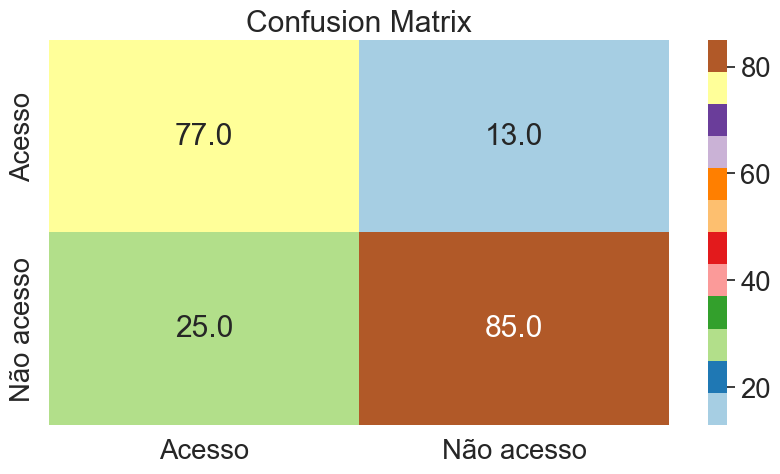

In [59]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion3, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); 
ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

roc_auc 0.9009090909090909


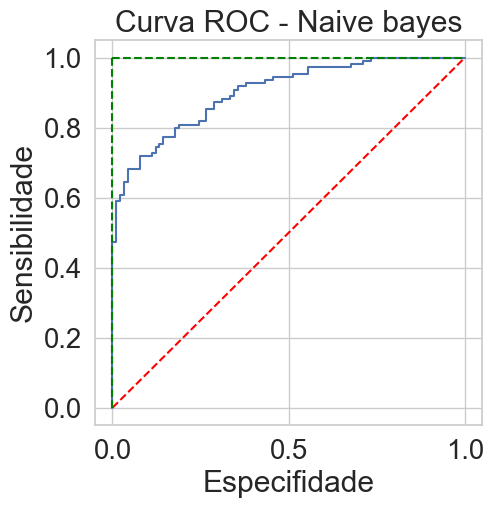

In [60]:
roc = model_naive_bayes.predict_proba(X_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Naive bayes')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [61]:
# Classification report modelo
class_report = classification_report(y_test, model_naive_bayes_pred_predict)
print("Modelo 03 - Naive Bayes")
print("\n")
print(class_report)

Modelo 03 - Naive Bayes


              precision    recall  f1-score   support

           0       0.75      0.86      0.80        90
           1       0.87      0.77      0.82       110

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [62]:
# Métricas modelo
precision = precision_score(y_test, model_naive_bayes_pred_predict)
Recall = recall_score(y_test, model_naive_bayes_pred_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
F1_Score = f1_score(y_test, model_naive_bayes_pred_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.867347
3,F1_Score,0.817308
2,Accuracy,0.810000
1,Recall,0.772727


## Modelo 04 - Random Forest

In [63]:
%%time

# Importando modelo
from sklearn.ensemble import RandomForestClassifier

# Treinamento modelo max_depth - determinando total de árvore, random_state 0
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) 

# Dados de treino, teste de x, y
model_random_forest_fit = model_random_forest.fit(X_train, y_train)

# Visualizando modelo
model_random_forest

CPU times: total: 46.9 ms
Wall time: 130 ms


RandomForestClassifier(max_depth=2, random_state=0)

In [64]:
# Valor da Accuracy do algoritmo 
model_random_forest_score = model_random_forest.score(X_train, y_train)
print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 93.00


In [65]:
# Previsão do modelo
model_random_forest_regressor_pred = model_random_forest.predict(X_test)
model_random_forest_regressor_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [66]:
# Accuracy modelo
accuracy_random_forest = accuracy_score(y_test, model_random_forest_regressor_pred)
print("Accuracy - Random forest: %.2f" % (accuracy_random_forest * 100))

Accuracy - Random forest: 94.00


In [67]:
# Confusion matrix
matrix_confusion4 = confusion_matrix(y_test, model_random_forest_regressor_pred)

print('Confusion matrix - Random forest \n\n', matrix_confusion4)
print('\nTrue Positives(TP) = ', matrix_confusion4[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion4[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion4[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion4[1,0])

Confusion matrix - Random forest 

 [[ 81   9]
 [  3 107]]

True Positives(TP) =  81

True Negatives(TN) =  107

False Positives(FP) =  9

False Negatives(FN) =  3


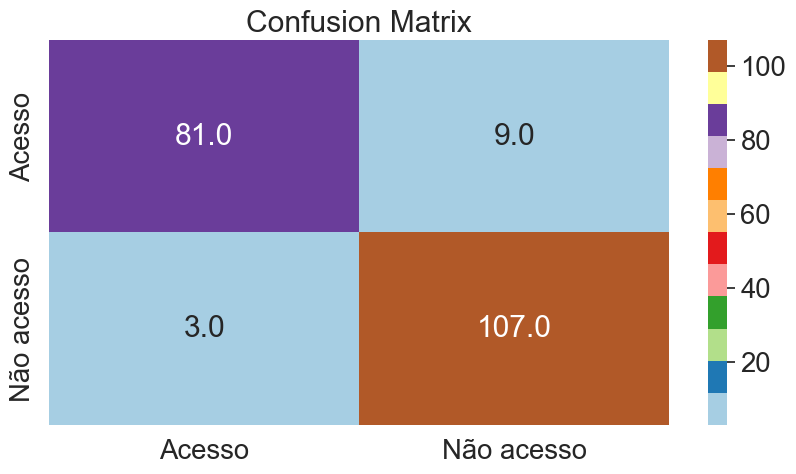

In [68]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion4, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); 
ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

roc_auc 0.9870707070707071


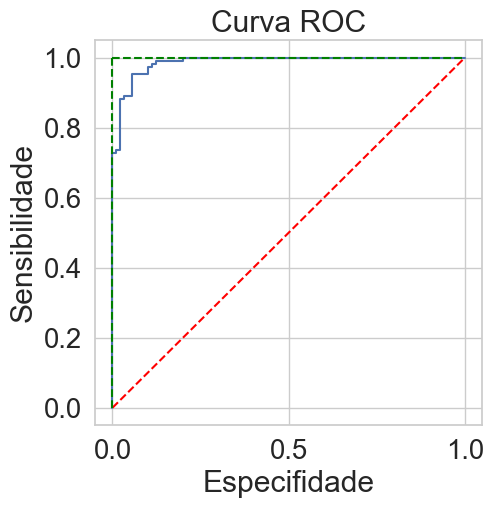

In [69]:
# Curva ROC
roc = model_random_forest.predict_proba(X_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [70]:
# classification report
classification = classification_report(y_test, model_random_forest_regressor_pred)
print("Modelo 04 - Random forest")
print()
print(classification)

Modelo 04 - Random forest

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        90
           1       0.92      0.97      0.95       110

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [71]:
# Métricas modelo modelo Random forest
precision = precision_score(y_test, model_random_forest_regressor_pred)
Recall = recall_score(y_test, model_random_forest_regressor_pred)
Accuracy = accuracy_score(y_test, model_random_forest_regressor_pred)
F1_Score = f1_score(y_test, model_random_forest_regressor_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.972727
3,F1_Score,0.946903
2,Accuracy,0.940000
0,precision,0.922414


## Modelo 05 - XGBoost

In [72]:
%%time

# Importando modelo
from xgboost import XGBClassifier

# Criando modelo
model_xgb = XGBClassifier()

# Treinamento modelo
model_xgb_fit = model_xgb.fit(X_train, y_train)

# Visualizando modelo
model_xgb

CPU times: total: 344 ms
Wall time: 81.8 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# Score modelo
model_xgb_score = model_xgb.score(X_train, y_train)
print("Modelo - XGBoost: %.2f" % (model_xgb_score * 100))

Modelo - XGBoost: 100.00


In [74]:
# Previsão do modelo - XGBoost

xgb_pred = model_xgb.predict(X_test)
xgb_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

In [75]:
# Accuracy modelo
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 100.00


In [76]:
# Confusion matrix modelo
matrix_confusion5 = confusion_matrix(y_test, xgb_pred)

print('Confusion matrix - XGBoost \n\n', matrix_confusion5)
print('\nTrue Positives(TP) = ', matrix_confusion5[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion5[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion5[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion5[1,0])

Confusion matrix - XGBoost 

 [[ 90   0]
 [  0 110]]

True Positives(TP) =  90

True Negatives(TN) =  110

False Positives(FP) =  0

False Negatives(FN) =  0


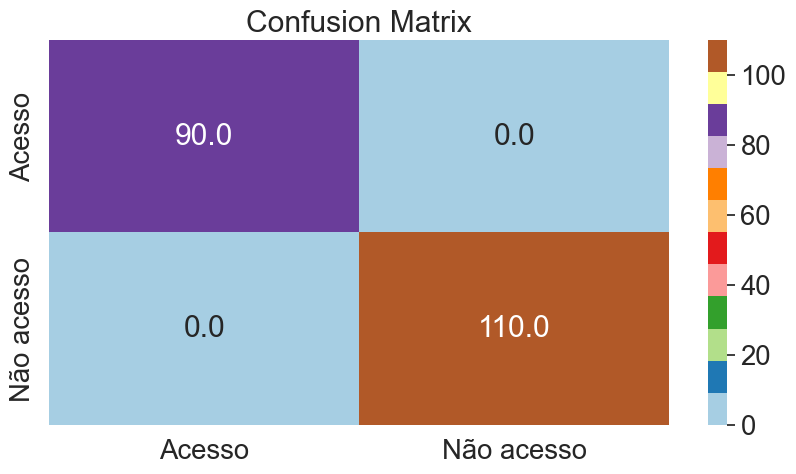

In [77]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion5, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); 
ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

roc_auc 1.0


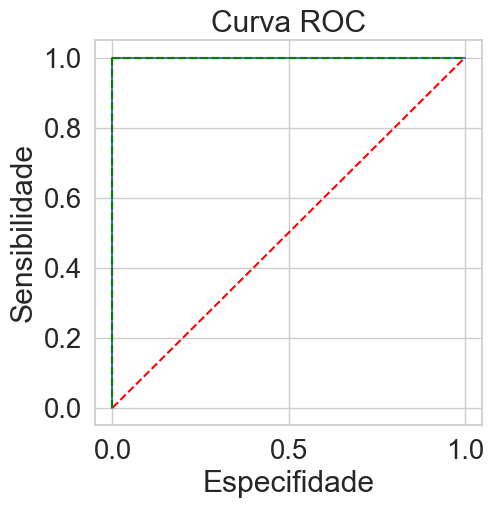

In [78]:
# Curva ROC
roc = model_xgb.predict_proba(X_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [79]:
# Classification report
classification = classification_report(y_test, xgb_pred)
print("Modelo 05 - XGBoost")
print()
print(classification)

Modelo 05 - XGBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       110

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [80]:
# Métricas modelo
precision = precision_score(y_test, xgb_pred)
Recall = recall_score(y_test, xgb_pred)
Accuracy = accuracy_score(y_test, xgb_pred)
F1_Score = f1_score(y_test, xgb_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,1.0
1,Recall,1.0
2,Accuracy,1.0
3,F1_Score,1.0


## Modelo 06 - Gradient Boosting

In [81]:
%%time

# Importando biblioteca
from sklearn.ensemble import GradientBoostingClassifier

# Criando modelo
model_gradient_boosting = GradientBoostingClassifier()

# Treinamento modelo
model_gradient_boosting_fit = model_gradient_boosting.fit(X_train, y_train)

# Visualizando modelo
model_gradient_boosting

CPU times: total: 31.2 ms
Wall time: 126 ms


GradientBoostingClassifier()

In [82]:
# Score modelo
model_gradient_boosting_score = model_gradient_boosting.score(X_train, y_train)
print("Modelo Score do Gradient Boosting: %.2f" % (model_gradient_boosting_score * 100))

Modelo Score do Gradient Boosting: 100.00


In [83]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(X_test)
model_gradient_boosting_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [84]:
# Accuracy score modelo
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)
print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 100.00


In [85]:
# Confusion matrix
matrix_confusion6 = confusion_matrix(y_test, model_gradient_boosting_pred)

print('Confusion matrix - Gradient Boosting \n\n', matrix_confusion6)
print('\nTrue Positives(TP) = ', matrix_confusion6[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion6[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion6[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion6[1,0])

Confusion matrix - Gradient Boosting 

 [[ 90   0]
 [  0 110]]

True Positives(TP) =  90

True Negatives(TN) =  110

False Positives(FP) =  0

False Negatives(FN) =  0


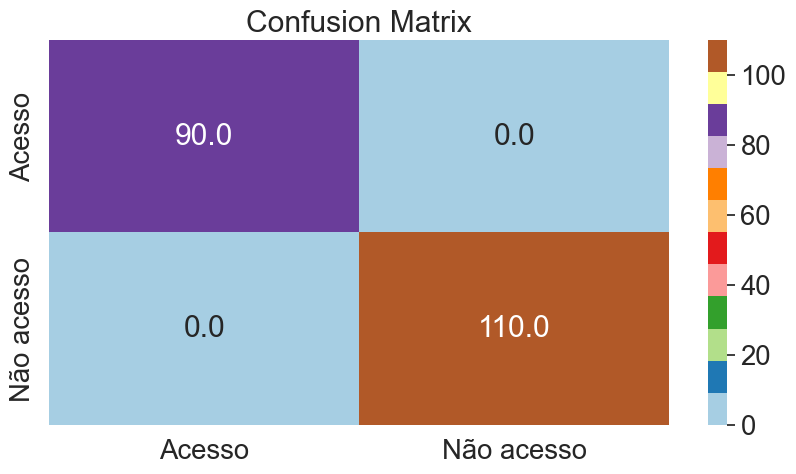

In [86]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion6, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); 
ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

roc_auc 1.0


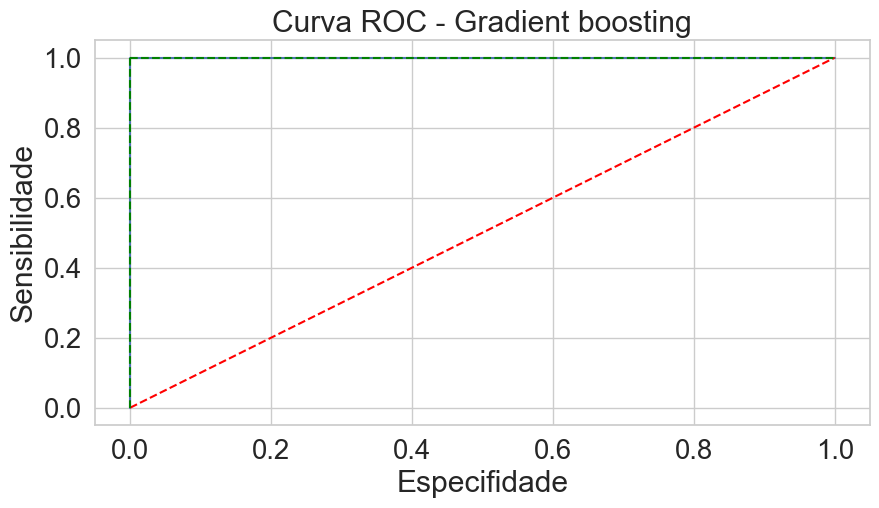

In [87]:
# Curva ROC
roc = model_gradient_boosting.predict_proba(X_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(10,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [88]:
# Classification report
classification = classification_report(y_test, xgb_pred)
print("Modelo 06 - Gradient boosting")
print()
print(classification)

Modelo 06 - Gradient boosting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       110

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [89]:
# Métricas modelo
precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,1.0
1,Recall,1.0
2,Accuracy,1.0
3,F1_Score,1.0


## Modelo 07 - Light Gradient Boosting Machine (LightGBM)

In [90]:
%%time

# Importando biblioteca
import lightgbm as lgb

# Defina os hiperparâmetros do modelo
parametros = {
    'objective': 'binary',  # Para problemas de classificação binária
    'metric': 'binary_logloss',  # Métrica de avaliação
    'boosting_type': 'gbdt',  # Tipo de boosting
    'num_leaves': 31,  # Número máximo de folhas em cada árvore
    'learning_rate': 0.05,  # Taxa de aprendizado
}

# Crie um dataset LightGBM a partir dos dados
train_data = lgb.Dataset(X_train, label=y_train)

# Treine o modelo
num_round = 250  # Número de iterações
modelo_LightGBM = lgb.train(parametros, train_data, num_round)
modelo_LightGBM

[LightGBM] [Info] Number of positive: 456, number of negative: 344
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.570000 -> initscore=0.281851
[LightGBM] [Info] Start training from score 0.281851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [91]:
# Salvar o modelo em um arquivo
modelo_LightGBM.save_model('modelo_lightgbm.txt')

In [92]:
# Faça previsões no conjunto de teste
modelo_pred = modelo_LightGBM.predict(X_test, num_iteration=modelo_LightGBM.best_iteration)

In [93]:
# Converta as previsões em classes (0 ou 1)
y_pred_binario = [1 if pred > 0.5 else 0 for pred in modelo_pred]

In [94]:
# Accuracy score modelo
accuracy_LightGBM_boosting = accuracy_score(y_test, y_pred_binario)
print("Acurácia - LightGBM: %.2f" % (accuracy_LightGBM_boosting * 100))

Acurácia - LightGBM: 99.00


In [95]:
# Confusion matrix
matrix_confusion7 = confusion_matrix(y_test, y_pred_binario)

print('Confusion matrix - LightGBM \n\n', matrix_confusion7)
print('\nTrue Positives(TP) = ', matrix_confusion7[0,0])
print('\nTrue Negatives(TN) = ', matrix_confusion7[1,1])
print('\nFalse Positives(FP) = ', matrix_confusion7[0,1])
print('\nFalse Negatives(FN) = ', matrix_confusion7[1,0])

Confusion matrix - LightGBM 

 [[ 90   0]
 [  2 108]]

True Positives(TP) =  90

True Negatives(TN) =  108

False Positives(FP) =  0

False Negatives(FN) =  2


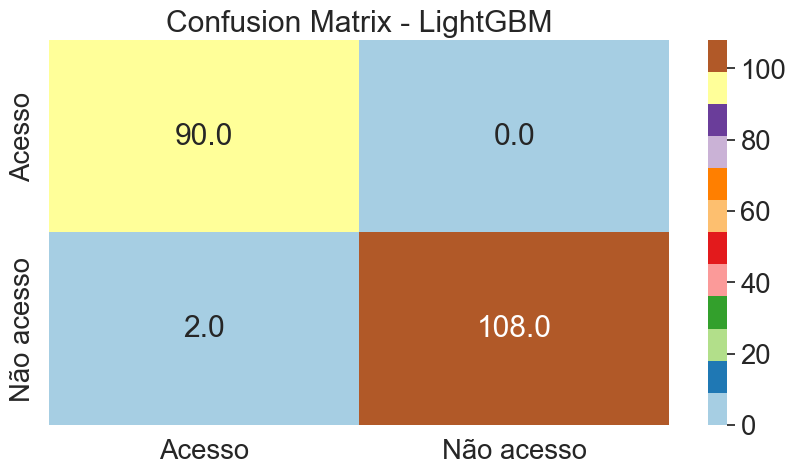

In [96]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))

ax = plt.subplot()
sns.heatmap(matrix_confusion7, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - LightGBM'); 
ax.xaxis.set_ticklabels(["Acesso", "Não acesso"]); 
ax.yaxis.set_ticklabels(["Acesso", "Não acesso"]);

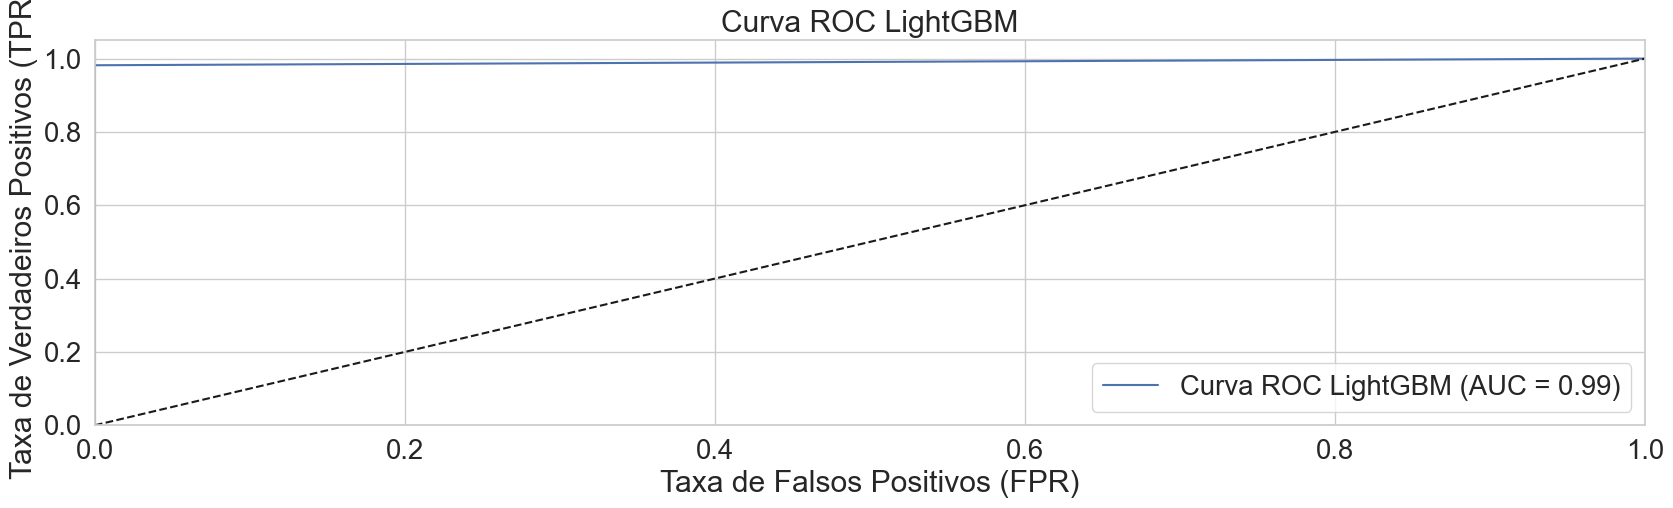

In [97]:
# Calcule a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binario)

# Calcule a AUC (Área sob a Curva ROC)
auc = roc_auc_score(y_test, y_pred_binario)

# Plote a Curva ROC
plt.figure(figsize=(20, 5))
plt.plot(fpr, tpr, label=f'Curva ROC LightGBM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC LightGBM')
plt.legend(loc="lower right")
plt.show()

In [98]:
# Classification report
classification = classification_report(y_test, y_pred_binario)
print("Modelo - 07 - LightGBM")
print("\n")
print(classification)

Modelo - 07 - LightGBM


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.98      0.99       110

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [99]:
# Métricas
precision = precision_score(y_test, y_pred_binario)
Recall = recall_score(y_test, y_pred_binario)
Accuracy = accuracy_score(y_test, y_pred_binario)
F1_Score = f1_score(y_test, y_pred_binario)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,1.000000
3,F1_Score,0.990826
2,Accuracy,0.990000
1,Recall,0.981818


## Resultados - Modelos machine learning

In [129]:
# Resultados modelo

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica",
               "Random Forest", 
               "Decision Tree",
               "Naive Bayes",
               "XGBoost",
               "Gradient boosting",
               "LightGBM"],

    "Acurácia" :[accuracy_regressao_logistica,
                 accuracy_random_forest, 
                 acuracia_decision_tree,
                 accuracy,
                 accuracy_XGBoost,
                 accuracy_model_gradient_boosting,
                 accuracy_LightGBM_boosting]})

modelos.sort_values(by = "Acurácia", ascending = True)

,Models,Acurácia
0,Regressão logistica,0.800
3,Naive Bayes,0.810
1,Random Forest,0.940
6,LightGBM,0.990
2,Decision Tree,0.995
4,XGBoost,1.000
5,Gradient boosting,1.000


## Salvando modelo 

In [116]:
import pickle

# Salvar o modelo 
with open('model_xgb_XGBoost.pkl', 'wb') as arquivo:
    pickle.dump(model_xgb, arquivo)
    
# Salvar o modelo 
with open('modelo_regressao_logistica.pkl', 'wb') as arquivo:
    pickle.dump(modelo_regressao_logistica, arquivo)
    
# Salvar o modelo 
with open('model_gradient_boosting.pkl', 'wb') as arquivo:
    pickle.dump(model_gradient_boosting, arquivo)
    
# Salvar o modelo 
with open('modelo_LightGBM.pkl', 'wb') as arquivo:
    pickle.dump(modelo_LightGBM, arquivo)

# Deploy modelo

In [105]:
# Importando biblioteca
import joblib

In [123]:
# Carregando o modelo do disco
modelo_carregado = joblib.load("modelo_v2_rg.pkl")

In [124]:
# Novos dados
novos_dados = pd.DataFrame({'numero_acessos': [60], 
                            'numero_cliques': [20]})

# Visualizando novos dados
novos_dados

,numero_acessos,numero_cliques
0,60,20


In [125]:
# Previsões com novos dados
previsoes_novos_dados_prob = modelo_carregado.predict_proba(novos_dados)[:, 1]
previsoes_novos_dados_prob

array([0.65629602])

In [126]:
previsoes_novos_dados_classe = np.where(previsoes_novos_dados_prob > 0.5, 'sim', 'não')
previsoes_novos_dados_classe

array(['sim'], dtype='<U3')

In [127]:
# Mostrando as previsões de classe e probabilidade
novos_dados['Lead_Convertido'] = previsoes_novos_dados_classe
novos_dados['Probabilidade'] = previsoes_novos_dados_prob * 100

In [128]:
# Criando um DataFrame para as previsões
previsoes_df = pd.DataFrame({'Lead_Convertido': previsoes_novos_dados_classe, 
                             'Probabilidade': previsoes_novos_dados_prob * 100})

# Visualizando resultado
previsoes_df

,Lead_Convertido,Probabilidade
0,sim,65.629602


# Conclusão

Este projeto de machine learning teve como foco a classificação de diferentes modelos, incluindo XGBoost, Gradient Boosting e Decision Tree. A principal pergunta abordada foi: "Um Lead será convertido? Sim ou Não? Qual a probabilidade?". Durante a análise, foram exploradas várias técnicas de modelagem preditiva para responder a essa questão.

Na primeira parte do projeto, exploramos a aplicação de diferentes algoritmos de classificação, como XGBoost, Gradient Boosting e Decision Tree, e último modelo Regressão logistica para determinar a probabilidade de conversão de leads. Esses modelos foram treinados e avaliados para identificar a abordagem mais eficaz na previsão de conversões.

Na terceira parte do projeto, avançamos para a fase de previsão, na qual nosso objetivo era responder à pergunta-chave: "O lead será convertido?". O resultado obtido indicou que a resposta era "sim", com uma probabilidade de compra de 65%. Esse resultado é altamente relevante para estratégias de marketing digital, pois fornece informações valiosas para direcionar recursos e esforços de marketing de forma mais eficiente.

Este projeto destaca a importância da aplicação de machine learning em marketing digital. Ele demonstra como modelos de classificação podem ser aproveitados para prever a probabilidade de conversão de leads, fornecendo insights cruciais para otimizar campanhas e maximizar o retorno sobre o investimento. Em resumo, trata-se de um projeto fascinante que ilustra a relevância e o potencial da inteligência artificial no contexto do marketing digital.

# Citação

Esse projeto na prática de machine learning da @Data Science Academy

# FIM